<img src="../image/logo-cefet.png" width="300">

<h1> PPCIC Dissertação - 2022
    <br>
    <br>
    DETECÇÃO DE EVENTOS ADVERSOS ATRAVÉS DO TWITTER UTILIZANDO O METAMAP PARA O PORTUGUÊS DO BRASIL </h1>
</br>

<h2> Matéria: CIC1229 - TÓPICOS ESPECIAIS EM ALGORITMOS </h2>
<h2> Aluno: Perciliano </h2>
<h2> Orientadora: Kele Belloze </h2>
<h3> Data: 13/06/2022 </h3>

---

**Autor: Luiz Perciliano** - 
***luiz.perciliano@eic.cefet-rj.br***


# Preparar Infraesrtutura

In [1]:
print(f'Importar as bibliotecas necessárias e mapear a pasta do projeto.')
import os
import sys
import pandas as pd
import datetime
#import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Importar as bibliotecas necessárias e mapear a pasta do projeto.


In [2]:
data_inicio = pd.Timestamp.now()
print(f'Iniciando o programa em: {data_inicio}')

Iniciando o programa em: 2022-06-15 08:22:39.945783


In [18]:
print(f'Lista do conteúdo da pasta ...')
os.listdir(os.path.join('..','data'))

Lista do conteúdo da pasta ...


['base-qualis-06-06-2021.xlsx',
 'bases_filtradas-completa-14-06-2022.xlsx',
 'bases_filtradas-resumida-14-06-2022.xlsx',
 'bases_filtradas_traduzida-26-09-2021.xlsx',
 'bkp',
 'pubmed-csv-naturallan-set-2022.csv',
 'pubmed.csv',
 'PubMed_Timeline_Results_by_Year-10-06-2021.csv',
 'requiremets.txt',
 'scopus-31-05-2022.csv',
 'scopus.csv',
 'stop_word_projeto.csv',
 'stop_word_pt.csv']

In [4]:
os.listdir('../Image')

['logo-cefet.png',
 'wordcloud.pdf',
 'wordcloud_resumo.pdf',
 'wordcloud_titulo.pdf']

# Preparar e carregar base de dados

## Carregar Planilha - Documentos para o Trabalho Relacioandos

In [19]:
#trabalhos_relacionados_traduzido = os.path.join('../data','bases_filtradas_traduzida-27-06-2021.xlsx')
#trabalhos_relacionados_traduzido = os.path.join('../data','bases_filtradas_traduzida-26-09-2021.xlsx') # 436 registros
trabalhos_relacionados_traduzido = os.path.join('../data','bases_filtradas-resumida-14-06-2022.xlsx') # 513 regitros
raw_data = pd.read_excel(trabalhos_relacionados_traduzido)
raw_data

,eid,doi,titulo_artigo,titulo_artigo_traduzido,ano,palavras_chaves_titulo,quantidade_citacoes,resumo,resumo_traduzido_google_translator,palavras_chaves_resumo,...,conceituar_metamap_data_file_builder_DFB,conceituar_ferramenta_lexicos_LVG,conceituar_MetamorphoSys,conceituar_NLP,conceituar_outros,observacao,leitura_conclusao,sincronizado_mendeley,data_leitura_resumo,data_leitura_completa
0,2-s2.0-85076585439,10.1093/jamia/ocz166,2018 n2c2 shared task on adverse drug events and medication extraction in electronic health records,2018 N2C2 Tarefa compartilhada em eventos adversos a medicamentos e extração de medicamentos em registros eletrônicos de saúde,2020.0,NaN,38.0,"objective: this article summarizes the preparation, organization, evaluation, and results of track 2 of the 2018 national nlp clinical challenges shared task. track 2 focused on extraction of adve...","Objetivo: Este artigo resume a preparação, organização, avaliação e resultados da faixa 2 da tarefa compartilhada clínica da NLP nacional de 2018. A faixa 2 focou na extração de eventos adversos a...",NaN,...,0,0,0,0,NaN,NaN,0,0,NaN,NaN
1,2-s2.0-84880829935,NaN,a comparative study of current clinical natural language processing systems on handling abbreviations in discharge summaries,Um estudo comparativo dos sistemas atuais de processamento de linguagem natural clínica ao lidar com abreviações nos resumos de alta,2012.0,twitter|metamap|nlp,51.0,clinical natural language processing (nlp) systems extract clinical information from narrative clinical texts in many settings. previous research mentions the challenges of handling abbreviations ...,Os sistemas clínicos de processamento de linguagem natural (PNL) extraem informações clínicas de textos clínicos narrativos em muitos contextos. Pesquisas anteriores mencionam os desafios do manus...,twitter|metamap|nlp,...,0,0,0,0,NaN,NaN,0,0,NaN,NaN
2,2-s2.0-85113413233,10.1109/csci51800.2020.00151,a comparative study of n gram and skip gram for clinical concepts extraction,Um estudo comparativo de N Gram e Skip Gram para extração de conceitos clínicos,2020.0,NaN,1.0,state-of-the-art technologies for clinical knowledge extraction are essential in a clinical decision support system (cdss) to make a prediction of a diagnosis. automatic analysis of a patient's he...,As tecnologias de ponta para extração de conhecimento clínico são essenciais em um sistema de apoio à decisão clínica (CDSS) para fazer uma previsão de um diagnóstico. A análise automática dos dad...,twitter|metamap|nlp,...,0,0,0,0,NaN,NaN,0,0,NaN,NaN
3,2-s2.0-78649321651,10.1016/j.jbi.2010.07.010,a comparison of machine learning techniques for detection of drug target articles,Uma comparação de técnicas de aprendizado de máquina para detecção de artigos de alvo de medicamentos,2010.0,NaN,11.0,"important progress in treating diseases has been possible thanks to the identification of drug targets. drug targets are the molecular structures whose abnormal activity, associated to a disease, ...","Progresso importante no tratamento de doenças foi possível graças à identificação de alvos de medicamentos. Os alvos de medicamentos são as estruturas moleculares cuja atividade anormal, associada...",NaN,...,0,0,0,0,NaN,NaN,0,0,NaN,NaN
4,2-s2.0-85107194770,10.1109/tcbb.2021.3081268,a comprehensive review of computational methods for drug drug interaction detection,Uma revisão abrangente dos métodos computacionais para detecção de interação com medicamentos,2021.0,NaN,2.0,"the detection of drug-drug interactions (ddis) is a crucial task for drug safety surveillance, which provides effective and safe co-prescriptions of multiple drugs. since laboratory researches are...","A detecção de interações medicamentosas (DDIs) é uma tarefa crucial para a vigilância de segurança de medicamentos, que fornece co-prescrições eficazes e seguras de múltiplos medicamentos. Como as...",twitter|metamap|nlp,...,0,0,0,0,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## Analisar dados brutos original

### Analisando base

In [20]:
pd.set_option("max_colwidth", 200)

In [21]:
print('Verificando tipos e se tem dados nulos')
raw_data.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   eid                                               497 non-null    object 
 1   doi                                               423 non-null    object 
 2   titulo_artigo                                     513 non-null    object 
 3   titulo_artigo_traduzido                           513 non-null    object 
 4   ano                                               497 non-null    float64
 5   palavras_chaves_titulo                            125 non-null    object 
 6   quantidade_citacoes                               424 non-null    float64
 7   resumo                                            497 non-null    object 
 8   resumo_traduzido_google_translator                513 non-nul

In [22]:
raw_data.leitura_resumo.nunique()

1

In [23]:
raw_data.nunique()

eid                                                 497
doi                                                 420
titulo_artigo                                       513
titulo_artigo_traduzido                             512
ano                                                  23
palavras_chaves_titulo                                1
quantidade_citacoes                                  81
resumo                                              497
resumo_traduzido_google_translator                  498
palavras_chaves_resumo                                1
conclusao_traduzida                                   0
quantidade_paginas_                                  24
link_scopus                                         497
editor                                               70
nome_conferencia                                    116
data_conferencia                                    115
local_conferencia                                    23
codigo_conferencia                              

In [24]:
# verificar campos nulos
raw_data.isnull().sum()

eid                                                  16
doi                                                  90
titulo_artigo                                         0
titulo_artigo_traduzido                               0
ano                                                  16
palavras_chaves_titulo                              388
quantidade_citacoes                                  89
resumo                                               16
resumo_traduzido_google_translator                    0
palavras_chaves_resumo                              138
conclusao_traduzida                                 513
quantidade_paginas_                                 155
link_scopus                                          16
editor                                              110
nome_conferencia                                    371
data_conferencia                                    371
local_conferencia                                   486
codigo_conferencia                              

## Copiar dataframe para ajustes

In [25]:
## Verificar se os dataframes nao s"ao espelhos
df_trab_relacionados = raw_data.copy()

print(id(df_trab_relacionados))

1946923496016


## Analisar dataframe tratado

In [12]:
display(df_trab_relacionados)

,id_pubmed,issn_scopus,titulo_artigo,titulo_artigo_scopus,titulo_artigo_scopus_traduzido,titulo_artigo_pubmed,titulo_artigo_pubmed_traduzido,ano_publicacao_scopus,quantidade_citacoes,documentos_6+,...,observacao,status_resumo,data_leitura_resumo,data_leitura_completa,sincronizado_mendely,nota_artigo,artigo_leitura,artigo_referencia_dissertacao,Unnamed: 90,citado_no_trabalho
0,22195162.0,1942597X,pattern mining for extraction of mentions of adverse drug reactions from user comments,Pattern mining for extraction of mentions of Adverse Drug Reactions from user comments.,Mineração de padrão para extração de menções de reações adversas de medicamentos a partir dos comentários do usuário.,NaN,macho,2011.0,88.0,0,...,Entra ou ñ para leitura: sim,Bom,NaN,NaN,0.0,NaN,0,0,NaN,NaN
1,NaN,16130073,a generic retrieval system for biomedical literatures ustb at bioasq2015 question answering task,A generic retrieval system for biomedical literatures: USTB at BioASQ2015 Question Answering Task,Um sistema de recuperação genérico para literaturas biomédicas: USTB na pergunta de resposta a bioastes215,NaN,macho,2015.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2,NaN,NaN,towards large scale twitter mining for drug related adverse events,Towards large-scale twitter mining for drug-related adverse events,Em direção a mineração de mineração de grandes escala para eventos adversos relacionados a drogas,NaN,macho,2012.0,132.0,0,...,Entra ou ñ para leitura: sim,Bom,NaN,NaN,0.0,NaN,0,0,NaN,NaN
3,23304375.0,1942597X,a comparative study of current clinical natural language processing systems on handling abbreviations in discharge summaries,A comparative study of current Clinical Natural Language Processing systems on handling abbreviations in discharge summaries.,Um estudo comparativo dos sistemas atuais de processamento de linguagem natural clínica na manipulação de abreviaturas nos resumos de alta.,NaN,macho,2012.0,46.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
4,20688192.0,15320464,a comparison of machine learning techniques for detection of drug target articles,A comparison of machine learning techniques for detection of drug target articles,Uma comparação de técnicas de aprendizagem de máquina para detecção de artigos alvo de drogas,NaN,macho,2010.0,10.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,31863657.0,NaN,adverse drug reaction detection in social media by deepm learning methods,NaN,macho,Adverse Drug Reaction Detection in Social Media by Deepm Learning Methods,Detecção adversa da reação medicamentosa em mídias sociais por métodos de aprendizagem profundos,NaN,1.0,0,...,Entra ou ñ para leitura: sim,Bom,2021-07-02 00:00:00,NaN,NaN,NaN,0,0,NaN,NaN
432,31896797.0,NaN,pgxcorpus a manually annotated corpus for pharmacogenomics,NaN,macho,"PGxCorpus, a manually annotated corpus for pharmacogenomics","Pgxcorpus, um corpus anotado manualmente para farmacogenômica",NaN,4.0,0,...,Entra ou ñ para leitura: não,Ruim,2021-07-02 00:00:00,NaN,NaN,NaN,0,0,NaN,NaN
433,32477654.0,NaN,normalizing adverse events using recurrent neural networks with attention,NaN,macho,Normalizing Adverse Events using Recurrent Neural Networks with Attention,Normalizando eventos adversos usando redes neurais recorrentes com atenção,NaN,0.0,0,...,Entra ou ñ para leitura: não,Ruim,2021-07-02 00:00:00,NaN,NaN,NaN,0,0,NaN,NaN
434,33718782.0,NaN,impact of pharmacogenomic information on values of care and quality of life associated with codeine and tramadol related adverse drug events,NaN,macho,Impact of Pharmacogenomic Information on Values of Care and Quality of Life Associated with Codeine and Tramadol-Related Adverse Drug Events,Impacto de informações farmacogenômicas sobre valores de cuidados e qualidade de vida associados a eventos adversos relacionados à codeína e tramadol,NaN,0.0,0,...,Entra ou ñ para leitura: não,Ruim,2021-07-02 00:00:00,NaN,NaN,NaN,0,0,NaN,NaN


# Visualizações

## Leitura das Introduções

**Obervações**
<br>
- 06+ = 5 separados para leitura dos resumos, ordenado do mais antigo para o mais novo
    1 tinha 3 páginas e não foi possível baixar o pdf para analisar:
    <br>"Structuring Clinical Decision Support Rules for Drug Safety Using Natural Language Processing"
    
    <br>

In [26]:
# Groupby by
leitura_resumo = df_trab_relacionados.groupby("leitura_resumo")

# Summary statistic of all
leitura_resumo.describe().head()

ano                                                         \
                count         mean       std     min     25%     50%     75%   
leitura_resumo                                                                 
0               497.0  2016.195171  4.514776  1992.0  2014.0  2017.0  2020.0   

                       quantidade_citacoes             ...  \
                   max               count       mean  ...   
leitura_resumo                                         ...   
0               2022.0               424.0  25.679245  ...   

               data_leitura_resumo     data_leitura_completa                   \
                               75% max                 count mean std min 25%   
leitura_resumo                                                                  
0                              NaN NaN                   0.0  NaN NaN NaN NaN   

                            
               50% 75% max  
leitura_resumo              
0              NaN NaN NaN  

[1 rows x 200 columns]

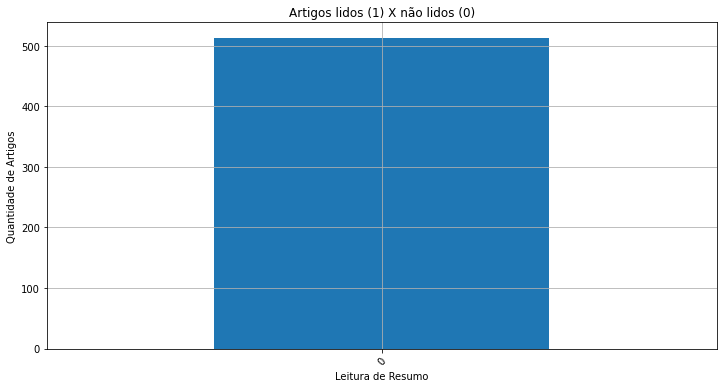

In [27]:
# colocar leganda 0 nao lido e 1 lido
plt.figure(figsize=(12,6))
plt.title("Artigos lidos (1) X não lidos (0)")

leitura_resumo.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Leitura de Resumo")
plt.ylabel("Quantidade de Artigos")
#lt.legend()
plt.grid()
plt.show()

In [15]:
## Dos separadas para ler, quais sao bons, execelentes e razoáveis

In [29]:
# Groupby by
status_resumo = df_trab_relacionados.groupby("status_resumo")

# Summary statistic of all
status_resumo.describe().head()

KeyError: 'status_resumo'

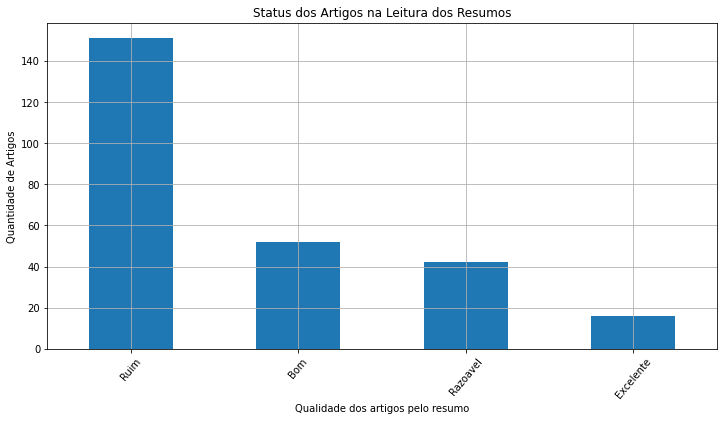

In [30]:
plt.figure(figsize=(12,6))
status_resumo.size().sort_values(ascending=False).plot.bar()
plt.title("Status dos Artigos na Leitura dos Resumos")
plt.xticks(rotation=50)
plt.xlabel("Qualidade dos artigos pelo resumo")
plt.ylabel("Quantidade de Artigos")
plt.grid()
plt.show()

# Artigos que podem entrar e nao entrou

- Pharmacovigilance in the era of social media: Discovering adverse drug events cross-relating Twitter and PubMed 
<br>(ao pesquisar   TITLE-ABS-KEY ( mining  AND for  AND adverse  AND drug  AND events  AND on  AND twitter ) ) = 28 resultados
- Detection of adverse drug reaction from twitter data
    - e outros com a query acima
- SSEL-ADE: A semi-supervised ensemble learning framework for extracting adverse drug events from social media, mesmo autor de um artigo interessante da pesquisa ()
- Adaptation of algorithms for medical information retrieval for working on russian-language text content



# Curiosidades

**dois artigos?**
<br>

Erratum to: Digital drug safety surveillance: Monitoring pharmaceutical products in Twitter (Drug Safety DOI: 10.1007/s40264-014-0155-x)

<br>

Digital drug safety surveillance: Monitoring pharmaceutical products in Twitter

# Tempo de Execução do trabalho

In [ ]:
data_fim = pd.Timestamp.now()
print(f'Programa iniciado em: {data_inicio}, e terminado em {data_fim}' )

In [ ]:
print(f'Shape da planinha: {df_trab_relacionados.shape}')